In [52]:
import numpy as np
import pandas as pd

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import SVG

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
data = pd.read_csv('lightning_data.tsv', sep='\t')

In [56]:
data.head(10)

,Unnamed: 0,Source,Left,Target,Right,Type,Subject,Order,Arg0_gram,Verb_fin,Verb_gram,Obj,Arg1,Arg1_gram,Arg1_anim,Has_arg2,Arg2,Arg2_gram,Direct_meaning,Fact
0,1.0,wsport.free.fr,"спрашивает: «Говорят, ты отравился?» Как будто",молнией меня ударило,. Откуда он мог это узнать?! Медленно повернулся,ins_acc,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",1,меня,acc,1,0,NaN,NaN,0,0
1,2.0,reaktivist.ru,херотень (за редким исключением). Какой,молнией её ударило,"доподлинно неизвестно, но пластинка 2014",ins_acc,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",1,её,acc,1,0,NaN,NaN,0,0
2,3.0,s37blog.ru,"например когда копали в запретной зоне),",молнией в него ударило,и т.п. Звоним оператору службы поддержки,ins_prep,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",0,в него,в+acc,1,0,NaN,NaN,1,1
3,4.0,heblit.bravepages.com,"его глазами, разинув рот, и вдруг будто",молнией меня ударило,. Ведь этот мальчишка похож чем-то на Игала,ins_acc,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",1,меня,acc,1,0,NaN,NaN,0,0
4,NaN,biografija.ru,гроз. 26 июля 1753 года Рихман был убит,"молнией, ударившей",в железный шест машины; Ломоносов в тот,nom_prep,1,молния ударить X,ins,0,"V,пе=прош,твор,ед,прич,полн,жен,сов,действ",0,в железный шест,в+acc,0,0,NaN,NaN,1,1
5,5.0,kartasnov.ru,"электронов, я чувствовал это, как будто",молнией в меня ударило,", неприятные ощущения. Не помню, что было",ins_prep,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",0,в меня,в+acc,1,0,NaN,NaN,0,0
6,6.0,a-mud.ru,"Когда Вас ""страхует"" лекарь, скорее всего,",молнией Вас не ударит,. Вот когда лекаря нет... А теперь добавлю,ins_acc,0,молния X ударить,ins,1,"V,пе=непрош,ед,изъяв,3-л,сов",1,Вас,acc,1,0,NaN,NaN,1,0
7,NaN,blogotshelnika.ru,Бог разгневался и послал жестокую грозу с,"молнией, ударившей",в дерево и убившей всех игроков. Это и,nom_prep,1,молния X ударить,ins,0,"V,пе=прош,твор,ед,прич,полн,жен,сов,действ",0,в дерево,в+acc,0,0,NaN,NaN,1,1
8,7.0,reformed.org.ua,у неопалимой купины. Приведенный в ужас,"молнией, которая ударила","в землю неподалеку от него, Лютер поклялся",ins_prep,0,молния ударить X,ins,1,"V,пе=прош,ед,изъяв,жен,сов",0,в землю,в+acc,0,0,NaN,NaN,1,1
9,NaN,vlklit.ru,"со слов родни, что тогда их чуть не убило","молнией, ударившей","в соседнее дерево. С тараканами же, напротив",nom_prep,1,молния ударить X,ins,0,"V,пе=прош,твор,ед,прич,полн,жен,сов,действ",0,в соседнее дерево,в+acc,0,0,NaN,NaN,1,1


In [57]:
# извлекаем признак времени из грамматического разбора глагола "ударить"
tense = []
for i in data['Verb_gram']:
    tense.append(i.split(',')[1])
tense = pd.Series(tense)

In [58]:
len(tense.value_counts())

3

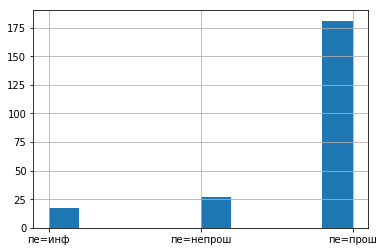

In [59]:
tense.hist()

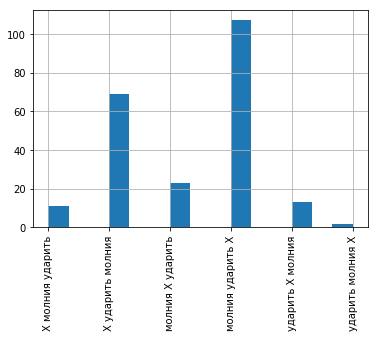

In [60]:
data.Order.hist(xrot=90, bins=15)

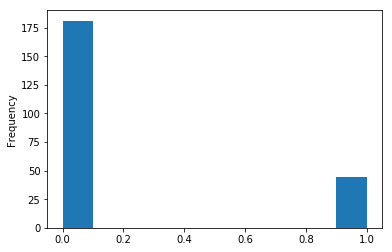

In [61]:
data.Obj.plot(kind='hist')

In [62]:
tense.value_counts()

пе=прош      181
пе=непрош     27
пе=инф        17
dtype: int64

In [63]:
data.Order.value_counts()

молния ударить X    107
X ударить молния     69
молния X ударить     23
ударить X молния     13
X молния ударить     11
ударить молния X      2
Name: Order, dtype: int64

In [64]:
# Obj: 0.421850544636
# молния ударить X: 0.25128884706
# Direct_meaning: 0.0947229571271
# Fact: 0.0680717588577
# X ударить молния: 0.0486339082556
# X молния ударить: 0.0413039172984
# Arg1_anim: 0.0393259312891
# молния X ударить: 0.0219810729968
# Verb_fin: 0.00870337737228
# ударить X молния: 0.00411768510695
# ударить молния X: 0.0
# Has_arg2: 0.0

In [65]:
# выбираем столбцы, которые потребуются для предсказания
# кодируем категориальные признаки в бинарные
data_bin_subj = pd.concat((data['Subject'], 
                      pd.get_dummies(data['Order']), 
                      data['Arg1_anim'],
                      data['Verb_fin'], 
                      data['Obj'], 
                      data['Has_arg2'], 
                    data['Direct_meaning'], 
                      data['Fact'],
                    pd.get_dummies(tense)), axis=1)

In [66]:
# корреляция Пирсона между признаками
data_bin_subj.corr()

,Subject,X молния ударить,X ударить молния,молния X ударить,молния ударить X,ударить X молния,ударить молния X,Arg1_anim,Verb_fin,Obj,Has_arg2,Direct_meaning,Fact,пе=инф,пе=непрош,пе=прош
Subject,1.000000,-0.255503,-0.019984,-0.263616,0.300217,-0.037847,0.032724,-0.323959,-0.057338,-0.519340,0.052093,0.448588,0.295292,0.098787,0.083296,-0.134070
X молния ударить,-0.255503,1.000000,-0.150783,-0.076503,-0.215894,-0.056143,-0.021471,0.186396,0.070815,0.251974,-0.034179,-0.363733,-0.199670,-0.064816,-0.020296,0.059818
X ударить молния,-0.019984,-0.150783,1.000000,-0.224414,-0.633305,-0.164690,-0.062983,0.283423,0.207731,0.036614,-0.100262,0.072254,0.032799,-0.117191,-0.067626,0.133495
молния X ударить,-0.263616,-0.076503,-0.224414,1.000000,-0.321321,-0.083559,-0.031956,0.133870,0.053844,0.166534,-0.050870,-0.203919,-0.208243,-0.096468,0.146276,-0.055566
молния ударить X,0.300217,-0.215894,-0.633305,-0.321321,1.000000,-0.235806,-0.090181,-0.329404,-0.140377,-0.177809,0.158315,0.203616,0.124957,0.232874,-0.023005,-0.136323
ударить X молния,-0.037847,-0.056143,-0.164690,-0.083559,-0.235806,1.000000,-0.023451,-0.169171,-0.257327,-0.122093,-0.037332,0.010412,0.100443,-0.070794,0.025792,0.026041
ударить молния X,0.032724,-0.021471,-0.062983,-0.031956,-0.090181,-0.023451,1.000000,-0.079491,0.029580,-0.046693,-0.014277,0.029580,0.055163,-0.027074,-0.034971,0.046693
Arg1_anim,-0.323959,0.186396,0.283423,0.133870,-0.329404,-0.169171,-0.079491,1.000000,0.198746,0.564642,0.179605,-0.340406,-0.424173,-0.103362,-0.004444,0.072515
Verb_fin,-0.057338,0.070815,0.207731,0.053844,-0.140377,-0.257327,0.029580,0.198746,1.000000,0.114626,-0.058860,-0.097561,-0.181937,0.089296,0.115342,-0.154002
Obj,-0.519340,0.251974,0.036614,0.166534,-0.177809,-0.122093,-0.046693,0.564642,0.114626,1.000000,0.305764,-0.397254,-0.279633,-0.056156,-0.113104,0.130085


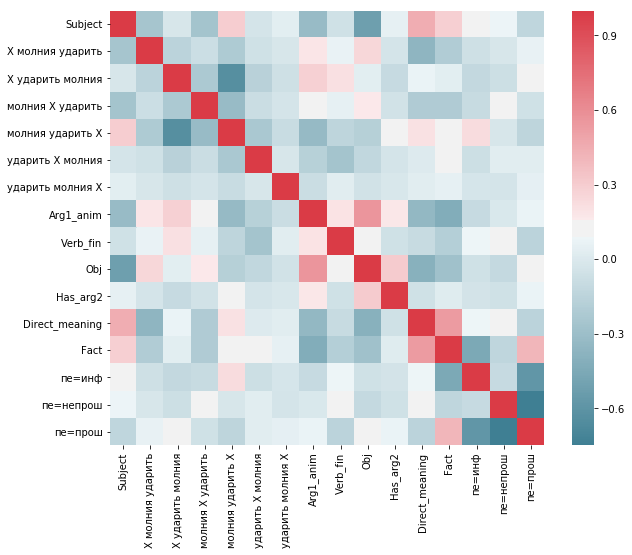

In [67]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data_bin_subj.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [68]:
data_bin_subj.corr().round(decimals=3).to_csv('corr.csv', sep='\t')

In [69]:
# выделяем целевую переменную и строим решающее дерево
# предыдущий запуск дерева и рандомного леса показал, что у признака "Has_arg2" нулевой вес, 
#                                                      поэтому для построения его не используем                                         
X_subj = data_bin_subj.drop(['Subject', 'Has_arg2'], axis =1)
y_subj = data_bin_subj['Subject']

In [70]:
for col in X_subj.columns:
    print(X_subj[col].value_counts())

0    214
1     11
Name: X молния ударить, dtype: int64
0    156
1     69
Name: X ударить молния, dtype: int64
0    202
1     23
Name: молния X ударить, dtype: int64
0    118
1    107
Name: молния ударить X, dtype: int64
0    212
1     13
Name: ударить X молния, dtype: int64
0    223
1      2
Name: ударить молния X, dtype: int64
0    132
1     93
Name: Arg1_anim, dtype: int64
1    205
0     20
Name: Verb_fin, dtype: int64
0    181
1     44
Name: Obj, dtype: int64
1    205
0     20
Name: Direct_meaning, dtype: int64
1    168
0     57
Name: Fact, dtype: int64
0    208
1     17
Name: пе=инф, dtype: int64
0    198
1     27
Name: пе=непрош, dtype: int64
1    181
0     44
Name: пе=прош, dtype: int64


In [71]:
dt = DecisionTreeClassifier()

In [72]:
dt.fit(X_subj, y_subj)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
y_pred = dt.predict(X_subj)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_subj, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.92      0.79        24
          1       0.99      0.95      0.97       201

avg / total       0.96      0.95      0.95       225



In [76]:
# реальное распределение
y_subj.value_counts()

1    201
0     24
Name: Subject, dtype: int64

In [77]:
# предсказанное распределение
pd.Series(y_pred).value_counts()

1    193
0     32
dtype: int64

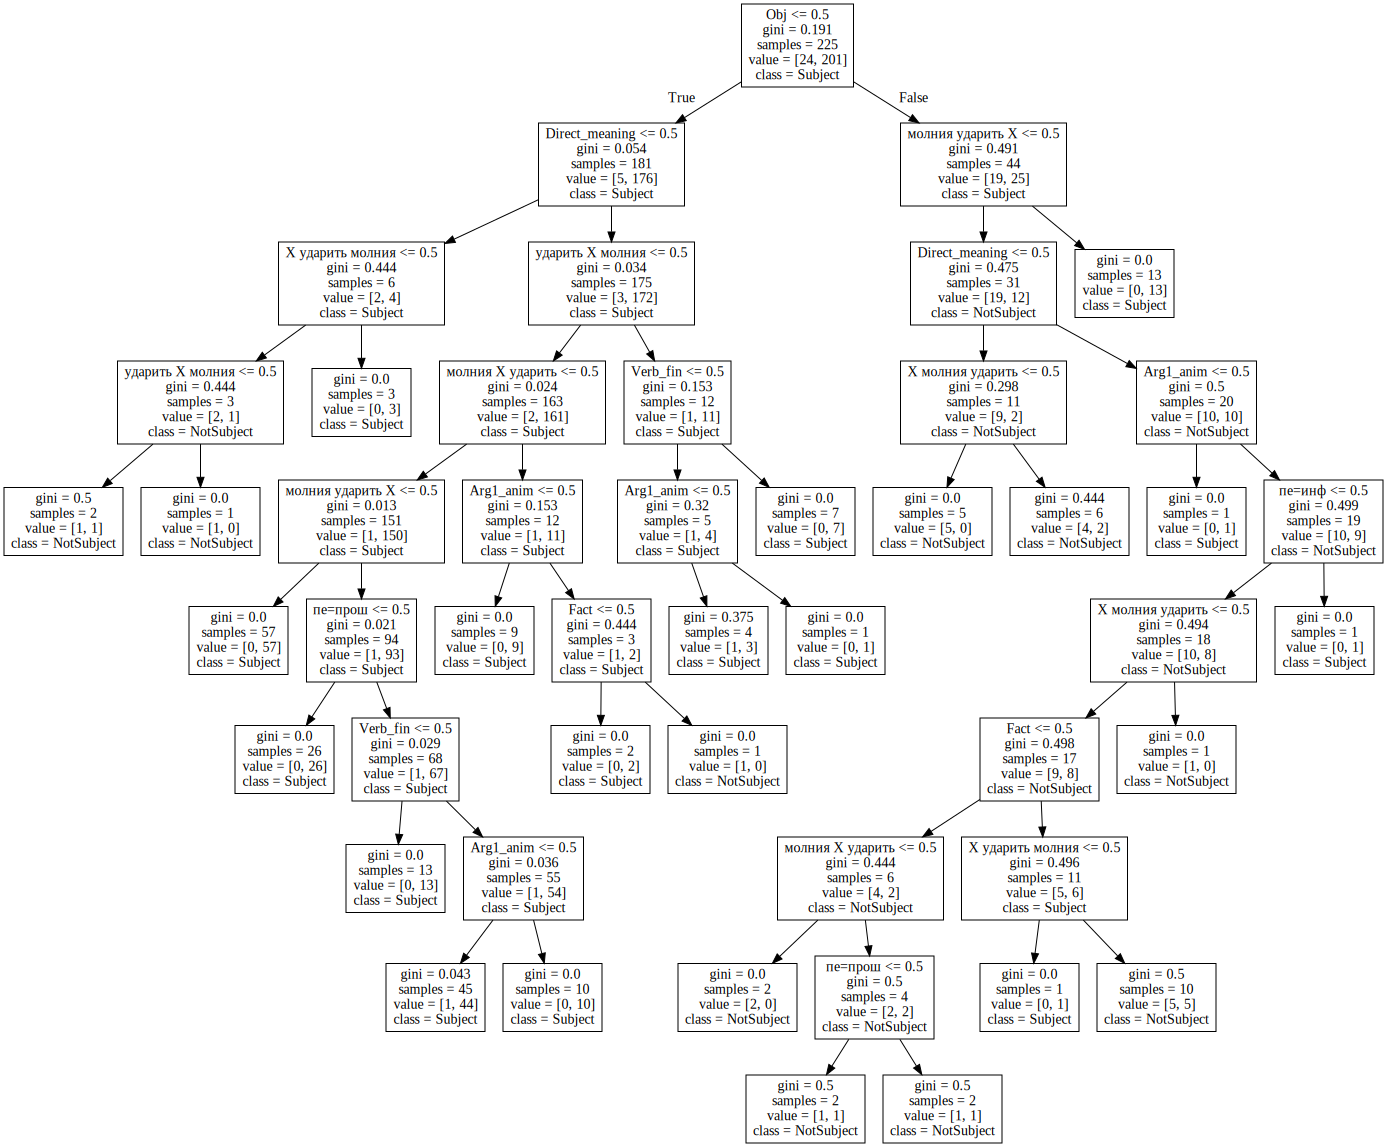

In [78]:
# посторенное дерево решений
graph = Source(export_graphviz(dt, out_file=None, feature_names=X_subj.columns, class_names = ['NotSubject', 'Subject']))
SVG(graph.pipe(format='svg'))

In [80]:
# сохраняем картинку
graph = Source(export_graphviz(dt, out_file=None, feature_names=X_subj.columns, class_names = ['NotSubject', 'Subject']))
png_bytes = graph.pipe(format='png')
with open('dtree_subject.png','wb') as f:
    f.write(png_bytes)

In [32]:
# посмотрим на веса признаков у дерева
importances = dt.feature_importances_
names = X_subj.columns

In [38]:
for i in sorted(zip(names, importances), key = lambda x: x[1], reverse =True):
    print('+ '+': '.join(map(str, i)))

+ Obj: 0.402163689155
+ молния ударить X: 0.239561738303
+ Direct_meaning: 0.0903024409244
+ Fact: 0.0585131946014
+ Arg1_anim: 0.0511453255354
+ X ударить молния: 0.0463642686037
+ молния X ударить: 0.0429136565822
+ X молния ударить: 0.0393763525222
+ пе=инф: 0.0164715164776
+ Verb_fin: 0.00835548583927
+ ударить X молния: 0.00454944558613
+ пе=прош: 0.00028288586914
+ ударить молния X: 0.0
+ пе=непрош: 0.0


In [34]:
# обучаем решающий лес и смотрим на веса признаков
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_subj, y_subj)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
f_importances = rf.feature_importances_

In [39]:
for i in sorted(zip(names, f_importances), key = lambda x: x[1], reverse =True):
    print('+ '+': '.join(map(str, i)))

+ Obj: 0.338357823583
+ Direct_meaning: 0.17480596781
+ молния ударить X: 0.106226034457
+ X молния ударить: 0.0718962692788
+ молния X ударить: 0.0658744098906
+ Arg1_anim: 0.0615940326082
+ Fact: 0.0524478396582
+ X ударить молния: 0.0412543027801
+ пе=прош: 0.028909251386
+ пе=непрош: 0.0168144709081
+ Verb_fin: 0.0166699545917
+ ударить X молния: 0.0126179664652
+ пе=инф: 0.0124663437492
+ ударить молния X: 6.5332834357e-05
